# Convolutional Neural Networks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# reshape dataset to have a single channel
X_train_full = X_train_full.reshape((X_train_full.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# one-hot encoding
y_train_full = keras.utils.to_categorical(y_train_full, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

# normalisation
X_train_full = X_train_full/255.0
X_test = X_test/255.0

# get validation dataset
np.random.seed(42) # we set the random seed to make sure everytime the data is shuffled in the same way 
shuffled_indices = np.random.permutation(X_train_full.shape[0])
X_valid, X_train = X_train_full[shuffled_indices[:5000]], X_train_full[shuffled_indices[5000:]]
y_valid, y_train = y_train_full[shuffled_indices[:5000]], y_train_full[shuffled_indices[5000:]]

In [3]:
X_train.shape
print(y_train.shape)

(55000, 10)


## Build CNN using Keras

Typical CNN architectures

- Input layer
- A few convolutional layers (+ReLU)
- A pooling layer
- A few convolutional layers (+ReLU)
- A pooling layer
- …
- Fully connected layers (+ReLU)
- Output layer


In [9]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=7, activation="relu", kernel_initializer='he_uniform', padding="same", input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu", kernel_initializer='he_uniform', padding="same"), 
    keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu", kernel_initializer='he_uniform', padding="same"), 
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu", kernel_initializer='he_uniform', padding="same"), 
    keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu", kernel_initializer='he_uniform', padding="same"), 
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(), # starting fully connected layers
    keras.layers.Dense(128, activation="relu", kernel_initializer='he_uniform'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation="relu", kernel_initializer='he_uniform'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 64)        3200      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 256)         295168    
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 256)        

In [5]:
model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Adam(),
              metrics=["accuracy"])

In [6]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30, 
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 160s 93ms/step - loss: 0.8682 - accuracy: 0.6856 - val_loss: 0.4046 - val_accuracy: 0.8536
Epoch 2/30
1719/1719 [==============================] - 173s 101ms/step - loss: 0.4681 - accuracy: 0.8381 - val_loss: 0.3813 - val_accuracy: 0.8724
Epoch 3/30
1719/1719 [==============================] - 171s 100ms/step - loss: 0.3902 - accuracy: 0.8670 - val_loss: 0.3251 - val_accuracy: 0.8886
Epoch 4/30
1719/1719 [==============================] - 169s 98ms/step - loss: 0.3403 - accuracy: 0.8842 - val_loss: 0.2914 - val_accuracy: 0.8958
Epoch 5/30
1719/1719 [==============================] - 182s 106ms/step - loss: 0.3109 - accuracy: 0.8945 - val_loss: 0.2993 - val_accuracy: 0.8924
Epoch 6/30
1719/1719 [==============================] - 180s 104ms/step - loss: 0.2854 - accuracy: 0.9023 - val_loss: 0.2816 - val_accuracy: 0.9014
Epoch 7/30
1719/1719 [==============================] - 189s 110ms/step - loss: 0.2705 - accuracy: 0.9086 - val_lo

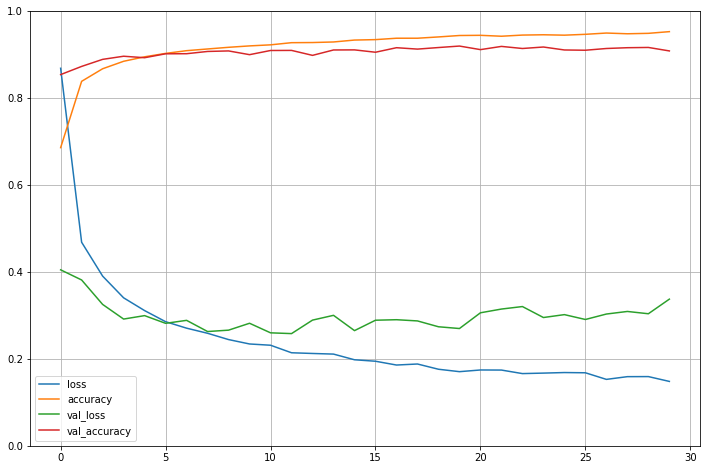

In [7]:
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.gca().set_ylim(0, 1)
plt.grid(True)
plt.show()

In [8]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 8s 26ms/step - loss: 0.3686 - accuracy: 0.9067


[0.36856764554977417, 0.9067000150680542]